# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

Summary of my topic: 

Exploring the Disparities in Internet Usage Among Older Adults

While the development of technology and the internet has brought convenience to our lives, the older generation is often left behind. The disparities in accessing information and resources among older adults are deepened by differences in racial background, socioeconomic status, education, and so forth. This project will focus on exploring the disparities in internet usage among older adults. 

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [19]:
#Import Dataset1: CSV document of 2022 AARP Healthy Living Survey of Adults Age 50 and Older
AARP = pd.read_csv('AARP2022.csv', 
                   usecols=['age', 'racethni', 'educ5', 'marital', 'state', 'metro', 'internet'],
                   encoding='ISO-8859-1') 
AARP

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


In [20]:
!pip install requests pandas

In [21]:
#Import Dataset2: API of Census data --- ACS 2022 
import requests
import pandas as pd

# Construct the API request URL
# The variables of total population from each race are selected
url = "https://api.census.gov/data/2022/acs/acs1?get=NAME,B01001A_001E,B01001B_001E,B01001C_001E,B01001D_001E,B01001E_001E,B01001F_001E&for=state:*"

# Make the GET request
response = requests.get(url)
data = response.json()

# Convert JSON to DataFrame and rename the column 
df = pd.DataFrame(data[1:], columns=data[0])

ACSRace=df.rename(columns={
    "B01001A_001E": "White",
    "B01001B_001E": "Black",
     "B01001C_001E": "American Indian and Alaska Native",
    "B01001D_001E": "Asian",
     "B01001E_001E": "Native Hawaiian and Other Pacific Islander ",
    "B01001F_001E": "Other race",
    "state": "State Code"
})

ACSRace

,NAME,White,Black,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other race,State Code
0,Alabama,3302528,1302035,24400,78893,None,102129,01
1,Alaska,437533,22202,95268,46184,14724,13365,02
2,Arizona,4254015,340760,301909,266441,15099,751130,04
3,Arkansas,2103849,437331,22250,48921,14229,91519,05
4,California,15175598,2121422,504589,6054038,159920,7597084,06
5,Colorado,4106707,235519,71351,190181,None,374838,08
6,Connecticut,2357855,380229,10269,175069,None,287206,09
7,Delaware,610378,224761,None,41501,None,40100,10
8,District of Columbia,257963,282578,None,27961,None,30768,11
9,Florida,12445576,3345420,90848,640512,12446,1457611,12


In [22]:
#Use of Pandas operations to filter out missing data in AARP data set
AARP.dropna(inplace=True)
AARP

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


In [23]:
#Use of Pandas operations to filter out outliers
Q1 = AARP['age'].quantile(0.25)
Q3 = AARP['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
AARP_filtered = AARP[(AARP['age'] >= lower_bound) & (AARP['age'] <= upper_bound)]
states_to_exclude = ['Alaska', 'Hawaii']

# Filtering the DataFrame to exclude specified states
AARP_filtered_cont = AARP_filtered[~AARP_filtered['state'].isin(states_to_exclude)]
AARP_filtered_cont

,age,racethni,educ5,marital,state,metro,internet
0,76,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Minnesota,Metro Area,Internet Household
1,86,"White, non-Hispanic",Bachelor's degree,Married,Pennsylvania,Metro Area,Internet Household
2,71,"White, non-Hispanic",HS graduate or equivalent,Separated,New Jersey,Metro Area,Internet Household
3,88,"White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Washington,Metro Area,Internet Household
4,72,"White, non-Hispanic",Post grad study/professional degree,Married,North Carolina,Metro Area,Internet Household
...,...,...,...,...,...,...,...
1959,53,Hispanic,Post grad study/professional degree,Divorced,Florida,Metro Area,Internet Household
1960,76,Hispanic,Post grad study/professional degree,Married,Florida,Metro Area,Internet Household
1961,73,Hispanic,Post grad study/professional degree,Separated,Florida,Metro Area,Internet Household
1962,60,Hispanic,Post grad study/professional degree,Married,Mississippi,Metro Area,Internet Household


The dataset has been cleaned when I downloaded it, so there's no missing data. However, there are three outliers. In the new dataframe 'AARP_filtered', the outliers have been removed.

In [24]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people live in metro area and live in non-metro area
internet_access_by_metro = AARP_filtered_cont.groupby('metro')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
internet_access_by_metro

internet,Internet Household,Non-internet household
metro,,
Metro Area,88.817705,11.182295
Non-Metro Area,80.508475,19.491525


In [25]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people from different racial group
internet_access_by_race = AARP_filtered_cont.groupby('racethni')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
internet_access_by_race

internet,Internet Household,Non-internet household
racethni,,
"2+, non-Hispanic",90.322581,9.677419
"Asian, non-Hispanic",100.000000,0.000000
"Black, non-Hispanic",80.498866,19.501134
Hispanic,86.386139,13.613861
"Other, non-Hispanic",86.666667,13.333333
"White, non-Hispanic",91.187739,8.812261


In [26]:
#Use "group-by" operations to produce pivot tables to see difference on access to internet between people from different state
internet_access_by_state = AARP_filtered_cont.groupby('state')['internet'].value_counts(normalize=True).unstack(fill_value=0) * 100
#Sort the percentage of older adults with internet access
internet_access_by_state_sorted = internet_access_by_state.sort_values(by='Internet Household')
internet_access_by_state_sorted

internet,Internet Household,Non-internet household
state,,
Oklahoma,61.538462,38.461538
Missouri,67.500000,32.500000
Louisiana,73.529412,26.470588
Utah,75.000000,25.000000
Kansas,75.000000,25.000000
Alabama,77.272727,22.727273
West Virginia,78.571429,21.428571
North Dakota,80.000000,20.000000
Idaho,80.000000,20.000000


In [27]:
sns.set(style="whitegrid")

# Visualization 1: Using AARP Data to explore Internet Access Rate by Race/Ethnicity
plt.figure(figsize=(10, 6))
internet_access_by_race['Internet Household'].plot(kind='bar', color='skyblue')
plt.title('Internet Access Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Percentage of Internet Households')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure. Ensure the path exists or it's in the current directory
plt.savefig('USCon_Internet_access_by_race.png', dpi=300)  # dpi=300 for good resolution
plt.close()  # Close the figure window to free up memory

In [28]:
# Visualization 2: Using AARP Data to explore Internet Access Rate by state
plt.figure(figsize=(14, 8))
internet_access_by_state['Internet Household'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Internet Access Rate by State')
plt.xlabel('Percentage of Internet Households')
plt.ylabel('State')
plt.tight_layout()

# Save the figure. Ensure the path exists or it's in the current directory
plt.savefig('USCon_Internet_access_rate_by_state.png', dpi=300)  # dpi=300 for good resolution
plt.close()  # Close the figure window to free up memory

In [29]:
# Visualization 3: Exploring Race Composition by State Using ACS 2022 Data
# Choose the first state as example. Replace None values with 0 to ensure numerical data for the heatmap. 
Sample = ACSRace.head(10)
selected_df = pd.DataFrame(Sample).set_index("NAME").fillna(0)

#Use Seaborn to create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.drop(columns=['State Code']).astype(int), annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Population Heatmap by Race and State')
plt.xlabel('Race')
plt.ylabel('State')
plt.xticks(rotation=45)

plt.savefig('Population_heatmap_by_race_and_state', dpi=300)  # dpi=300 for good resolution
plt.close()  # Close the figure window to free up memory

Interpretation of the Data

1.1. From the pivot table analysis, it is observed that older adults living in metropolitan areas have a higher percentage of internet access. Among racial groups, Asian older adults have the highest percentage of internet access, while Black older adults have the lowest. Oklahoma, Missouri, Louisiana, Utah, and Kansas are the five states with the lowest percentage of internet access among older adults.

1.2. From the visualizations, the first two graphs align with the findings from the table, showing that Asian older adults have the highest percentage of internet access, and Black older adults have the lowest. Similarly, Oklahoma, Missouri, Louisiana, Utah, and Kansas are identified as the five states with the lowest percentage of internet access among older adults. The third graph, utilizing ACS 2022 data, visually explores the racial composition in 10 states, highlighting California's greater racial diversity compared to other states.


Research Question:
- Is there a disparity in internet access among older adults?

In the digital age, access to the internet has become a critical factor in determining the quality of life, influencing everything from social engagement to access to information and services. As such, disparities in internet access can significantly impact various demographics, particularly older adults. This research aims to delve into the question: Is there a disparity in internet access among older adults? By examining this issue, I hope to uncover patterns of inequality that may exist based on geographic location, socioeconomic status, race, or other factors.

The internet has proven to be a vital resource for health information, social connectivity, and even financial management. However, not all older adults have the same level of access to these digital benefits. Preliminary data suggests that there might be significant disparities in internet access among older adults, potentially leading to a digital divide within this demographic. Such a divide could exacerbate existing inequalities and limit the ability of some older adults to fully participate in increasingly digital societies.

Several factors might contribute to disparities in internet access among older adults. For instance, older adults in metropolitan areas may have higher internet access rates than those in rural areas due to better infrastructure and availability of services. Moreover, there might be racial disparities in internet access, with some racial groups having higher access rates than others. Economic factors also play a crucial role, as the cost of internet services and devices can be prohibitive for some older adults, limiting their ability to go online.

This research will investigate these disparities. By mapping out internet access rates among older adults across different states and analyzing access rates among different racial and socioeconomic groups, I aim to paint a comprehensive picture of the digital landscape faced by older adults in the United States. Understanding whether and where disparities in internet access among older adults exist is crucial for developing targeted interventions to bridge the digital divide. By ensuring equitable internet access, we can help older adults stay connected, informed, and engaged, ultimately improving their quality of life and participation in the digital world.

Research Plan:

3.1. Clean the data.

3.2. Conduct an analysis of older adults living in the US using ACS 2022 data:
- Create a map to visualize the distribution of older adults from each racial group across different states.

3.3. Visualize internet access among older adults living in the US using AARP Data:
- Create a map to visualize internet access among older adults in different states.
- Create a map to visualize internet access among older adults from different racial groups in various states (e.g., select Asian older adults and visualize their internet access compared to other racial groups' older adults in different states).

3.4. Conclude the analysis and wrap up the project.

In [30]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


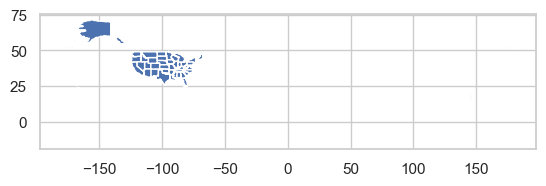

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

path_to_shapefile = 'tl_2023_us_state/tl_2023_us_state.shp'

gdf = gpd.read_file(path_to_shapefile)

gdf.plot()
plt.show()

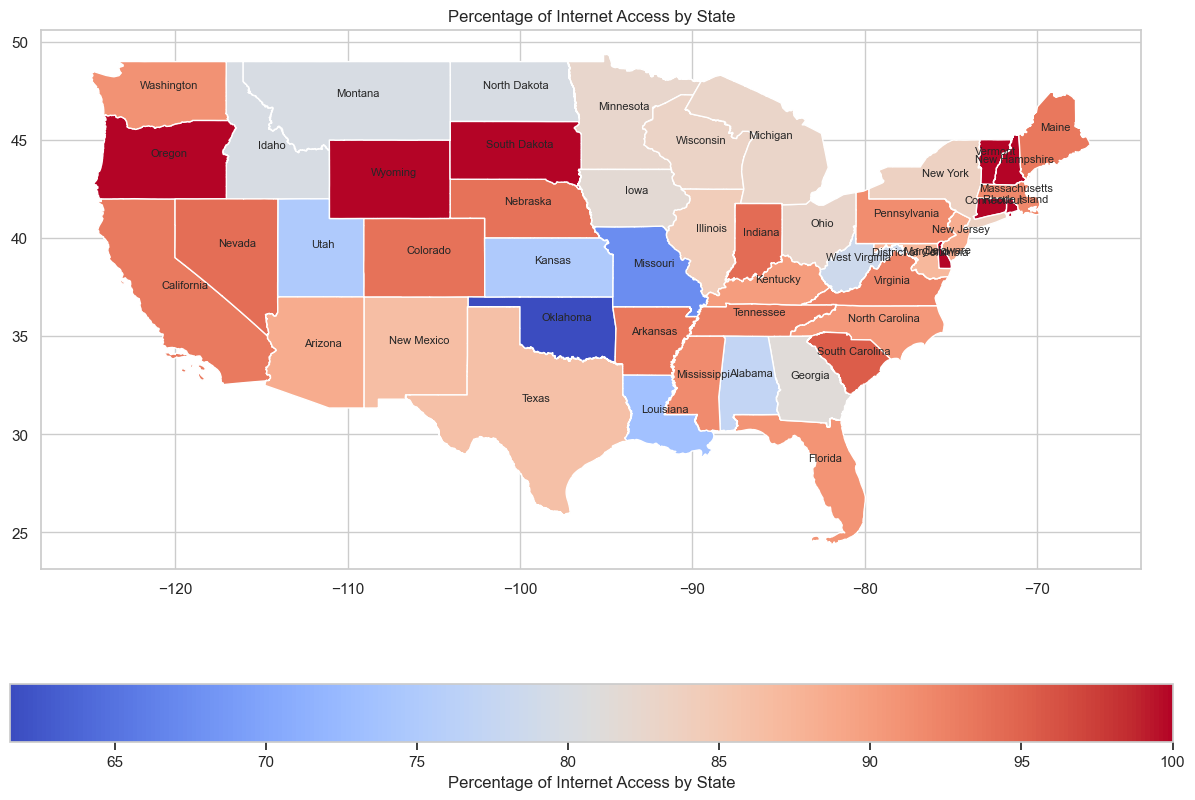

In [32]:
# Merge your data with the GeoDataFrame
internet_access_by_state.reset_index(inplace=True)
merged_gdf = gdf.merge(internet_access_by_state, left_on='NAME', right_on='state', how='left')

# Create a plot with a specific size
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the data using a color map
merged_gdf.plot(column='Internet Household', ax=ax, legend=True, 
                legend_kwds={'label': "Percentage of Internet Access by State",
                             'orientation': "horizontal"},
                cmap='coolwarm')

# Calculate the centroids of the states and use them to place text labels
for idx, row in merged_gdf.iterrows():
    # Get the coordinates of the centroid
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    # Place the state name at the centroid coordinates
    ax.annotate(text=row['NAME'], xy=(x, y), xytext=(3, 3), textcoords="offset points",
                ha='center', fontsize=8)

# Add a title and save the figure
plt.title('Percentage of Internet Access by State')
plt.savefig('USCon_internet_access_by_state.png')
plt.show()

In [33]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [34]:
import folium
geojson_data = merged_gdf.to_json()

# Create the base map
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add the GeoJSON layer
folium.GeoJson(
    geojson_data,
    name='US States',
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['state', 'Internet Household', 'Non-internet household'],
        aliases=['State:', 'Internet Access:', 'No Internet Access:'],
        localize=True
    )
).add_to(map)

# Add a layer control panel to the map
folium.LayerControl().add_to(map)

# Display the map
map

# Save
map.save('Basemap.html')

In [35]:
import pandas as pd

# Load your data
df = pd.DataFrame(AARP_filtered)

# Group the data by state and other categories and calculate the percentage of internet access
summary = df.groupby(['state', 'racethni', 'educ5', 'marital', 'metro'])['internet'].apply(
    lambda x: (x == 'Internet Household').mean() * 100
).reset_index(name='percentage')
summary

,state,racethni,educ5,marital,metro,percentage
0,Alabama,"Black, non-Hispanic",Bachelor's degree,Married,Metro Area,100.0
1,Alabama,"Black, non-Hispanic",Bachelor's degree,Separated,Non-Metro Area,0.0
2,Alabama,"Black, non-Hispanic",HS graduate or equivalent,Married,Metro Area,100.0
3,Alabama,"Black, non-Hispanic",HS graduate or equivalent,Separated,Metro Area,0.0
4,Alabama,"Black, non-Hispanic",Vocational/tech school/some college/ associates,Divorced,Metro Area,0.0
...,...,...,...,...,...,...
1075,Wisconsin,"White, non-Hispanic",Vocational/tech school/some college/ associates,Never married,Metro Area,100.0
1076,Wisconsin,"White, non-Hispanic",Vocational/tech school/some college/ associates,Never married,Non-Metro Area,100.0
1077,Wisconsin,"White, non-Hispanic",Vocational/tech school/some college/ associates,Separated,Metro Area,100.0
1078,Wyoming,"White, non-Hispanic",HS graduate or equivalent,Married,Non-Metro Area,100.0


In [36]:
print(gdf.columns)  # Check the column names of the GeoDataFrame
print(summary.columns)  # Check the column names of your summary DataFrame
# Rename 'NAME' column in gdf to 'state'
gdf.rename(columns={'NAME': 'state'}, inplace=True)
gdf=gdf[['state','geometry']]

# Now perform the merge
merged_gdf = gdf.merge(summary, on='state', how='left')

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'GEOIDFQ',
       'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')
Index(['state', 'racethni', 'educ5', 'marital', 'metro', 'percentage'], dtype='object')


In [37]:
merged_gdf

,state,geometry,racethni,educ5,marital,metro,percentage
0,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",Hispanic,Vocational/tech school/some college/ associates,Married,Metro Area,100.000000
1,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Bachelor's degree,Married,Metro Area,100.000000
2,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Bachelor's degree,Married,Non-Metro Area,100.000000
3,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",HS graduate or equivalent,Married,Metro Area,100.000000
4,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",HS graduate or equivalent,Widowed,Metro Area,100.000000
...,...,...,...,...,...,...,...
1080,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Vocational/tech school/some college/ associates,Living with partner,Metro Area,100.000000
1081,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Vocational/tech school/some college/ associates,Married,Metro Area,85.714286
1082,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Vocational/tech school/some college/ associates,Never married,Metro Area,100.000000
1083,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Vocational/tech school/some college/ associates,Separated,Metro Area,100.000000


In [38]:
merged_gdf['marital'].value_counts()

marital
Married                403
Divorced               203
Never married          196
Separated              119
Widowed                109
Living with partner     50
Name: count, dtype: int64

In [39]:
marital_replace = ['Divorced', 'Never married', 'Separated', 'Widowed', 'Living with partner']

# Replace the specified categories with 'Not married' in the 'marital' column
merged_gdf['marital'] = merged_gdf['marital'].replace(marital_replace, 'Not married')

# Optionally, check the updated counts of each category to verify the changes
print(merged_gdf['marital'].value_counts())


marital
Not married    677
Married        403
Name: count, dtype: int64


In [40]:
merged_gdf['racethni'].value_counts()

racethni
White, non-Hispanic    555
Black, non-Hispanic    263
Hispanic               198
2+, non-Hispanic        31
Asian, non-Hispanic     18
Other, non-Hispanic     15
Name: count, dtype: int64

In [41]:
race_replace = ['2+, non-Hispanic', 'Asian, non-Hispanic', 'Other, non-Hispanic']

# Replace the specified categories with 'Not married' in the 'marital' column
merged_gdf['racethni'] = merged_gdf['racethni'].replace(race_replace, 'Other')

# Optionally, check the updated counts of each category to verify the changes
print(merged_gdf['racethni'].value_counts())

racethni
White, non-Hispanic    555
Black, non-Hispanic    263
Hispanic               198
Other                   64
Name: count, dtype: int64


In [42]:
merged_gdf['educ5'].value_counts()

educ5
Vocational/tech school/some college/ associates    404
HS graduate or equivalent                          217
Bachelor's degree                                  209
Post grad study/professional degree                191
Less than HS                                        59
Name: count, dtype: int64

In [43]:
educ_replace1 = ["Vocational/tech school/some college/ associates", "Bachelor's degree", "Post grad study/professional degree"]
educ_replace2 = ["HS graduate or equivalent", "Less than HS"]

# Replace the specified categories with 'Not married' in the 'marital' column
merged_gdf['educ5'] = merged_gdf['educ5'].replace(educ_replace1 , 'Above HS')
merged_gdf['educ5'] = merged_gdf['educ5'].replace(educ_replace2 , 'Equal or Under HS')
                 
# Optionally, check the updated counts of each category to verify the changes
print(merged_gdf['educ5'].value_counts())

educ5
Above HS             804
Equal or Under HS    276
Name: count, dtype: int64


In [44]:
merged_gdf['metro'].value_counts()

metro
Metro Area        895
Non-Metro Area    185
Name: count, dtype: int64

In [45]:
merged_gdf

,state,geometry,racethni,educ5,marital,metro,percentage
0,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",Hispanic,Above HS,Married,Metro Area,100.000000
1,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Above HS,Married,Metro Area,100.000000
2,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Above HS,Married,Non-Metro Area,100.000000
3,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Equal or Under HS,Married,Metro Area,100.000000
4,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...","White, non-Hispanic",Equal or Under HS,Not married,Metro Area,100.000000
...,...,...,...,...,...,...,...
1080,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Above HS,Not married,Metro Area,100.000000
1081,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Above HS,Married,Metro Area,85.714286
1082,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Above HS,Not married,Metro Area,100.000000
1083,Arizona,"POLYGON ((-110.75069 37.00301, -110.74193 37.0...","White, non-Hispanic",Above HS,Not married,Metro Area,100.000000


In [46]:
import folium
import geopandas as gpd

# Create the base map
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4, max_zoom=5)

def add_data_layer(df, layer_name):
    # Simplify geometries to reduce file size and improve rendering speed
    df['geometry'] = df['geometry'].simplify(tolerance=0.01, preserve_topology=True)

    # Select only necessary columns for the tooltip
    df = df[['geometry', 'state', 'racethni', 'educ5', 'metro','percentage']]
    
    folium.GeoJson(
        df.to_json(),
        name=layer_name,
        style_function=lambda feature: {
            'fillColor': 'green' if feature['properties']['percentage'] >= 50 else 'red',
            'color': 'black',
            'weight': 2,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(
            fields=['state', 'racethni', 'educ5', 'metro','percentage'],
            aliases=['State:', 'Race/Ethnicity:', 'Education:', 'Metro:','Internet Access (%):'],
            localize=True
        )
    ).add_to(map)

# Load and prepare your GeoDataFrame
# merged_gdf = gpd.read_file('your_data_file.shp') # Load your data as needed

# Loop through each unique combination of 'racethni', 'educ5', 'marital', and 'metro'
for (racethni, educ5, marital, metro), group in merged_gdf.groupby(['racethni', 'educ5', 'marital', 'metro']):
    layer_name = f"{racethni}, {educ5}, {marital}, {metro}"
    add_data_layer(group, layer_name)

# Add a layer control panel to toggle different layers
folium.LayerControl().add_to(map)

# Save the map to an HTML file
map.save('US_demographic_internet_access_map.html')
